<a href="https://colab.research.google.com/github/SharmaVansh1910/IPL-Data-Analysis/blob/main/IPL_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Libraries Ready")


✅ Libraries Ready


In [2]:
matches = pd.read_csv("/content/matches.csv")
deliveries = pd.read_csv("/content/deliveries.csv")

matches.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
print("Matches dataset shape:", matches.shape)
print("Deliveries dataset shape:", deliveries.shape)

print(matches.info())
print(deliveries.info())


Matches dataset shape: (636, 18)
Deliveries dataset shape: (150460, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    obj

<Axes: ylabel='winner'>

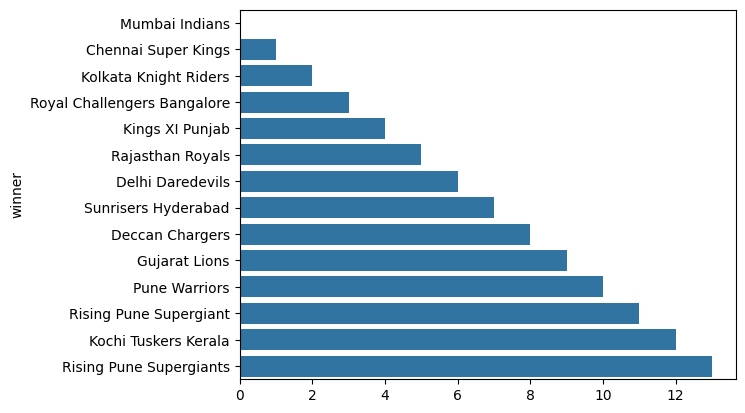

In [5]:
sns.barplot(matches['winner'].value_counts().index)

In [6]:
deliveries.head()


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


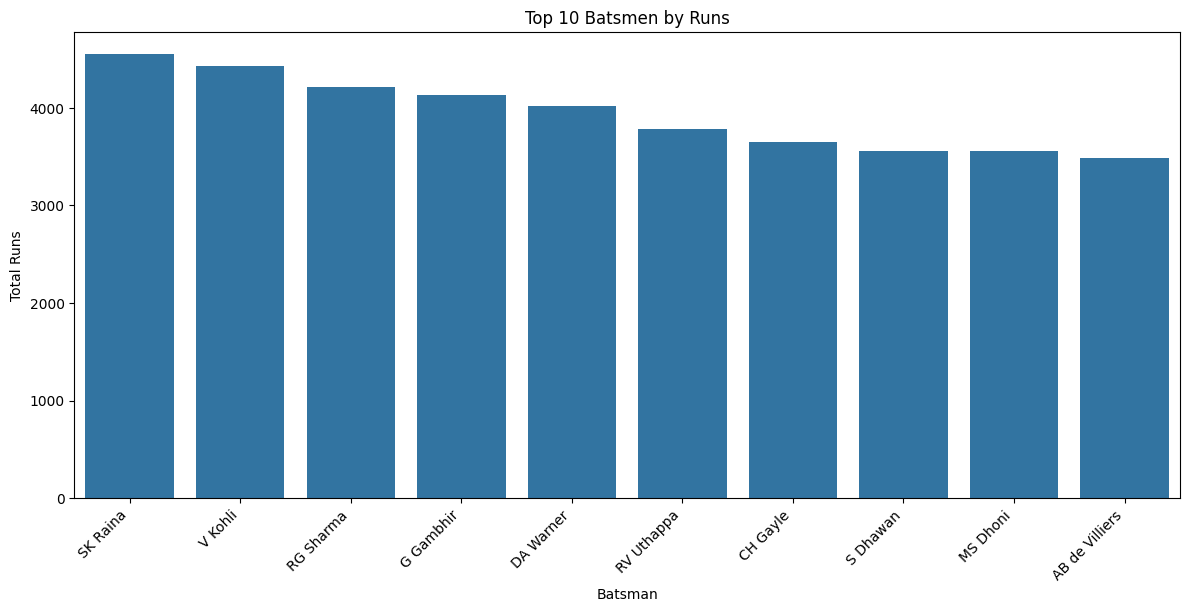

In [15]:
top_batsmen = (
    deliveries.groupby('batsman')['batsman_runs']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_batsmen, x='batsman', y='batsman_runs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title("Top 10 Batsmen by Runs")
plt.xlabel("Batsman")
plt.ylabel("Total Runs")
plt.show()


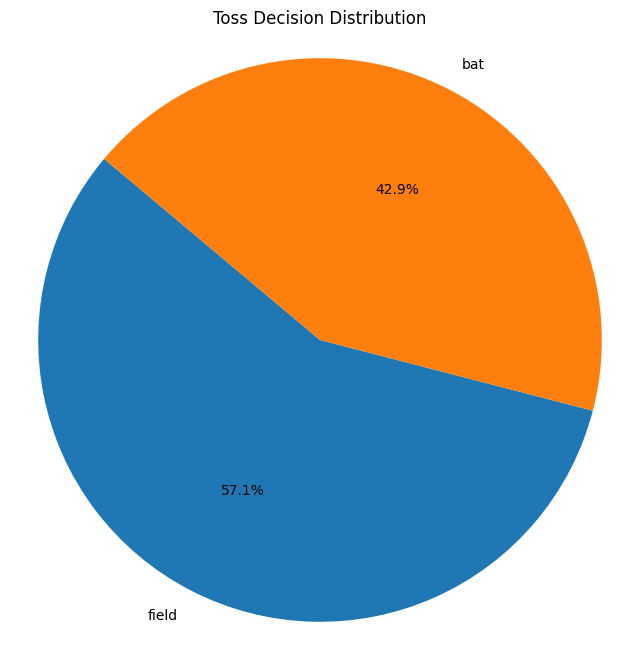

In [17]:
plt.figure(figsize=(8, 8))
plt.pie(matches['toss_decision'].value_counts(), labels=matches['toss_decision'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title("Toss Decision Distribution")
plt.axis('equal')
plt.show()

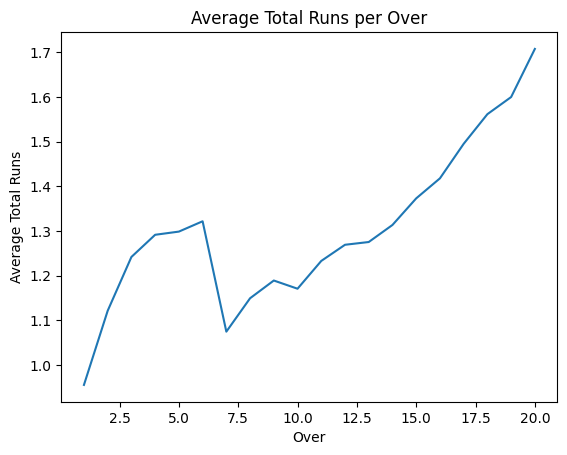

In [19]:
sns.lineplot(deliveries.groupby('over')['total_runs'].mean())
plt.title("Average Total Runs per Over")
plt.xlabel("Over")
plt.ylabel("Average Total Runs")
plt.show()

In [22]:
df=matches[matches['toss_winner']==matches['winner']]
df.shape

(325, 18)

In [23]:
matches.to_csv("/content/cleaned_matches.csv", index=False)
deliveries.to_csv("/content/cleaned_deliveries.csv", index=False)


In [24]:
deliveries.isnull()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
150456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
150457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
150458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True


In [26]:
deliveries.notnull()


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
150456,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
150457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
150458,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False


In [27]:
deliveries.isna()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
150456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
150457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
150458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True


In [30]:
deliveries.fillna(0, inplace=True)
matches.fillna(0, inplace=True)

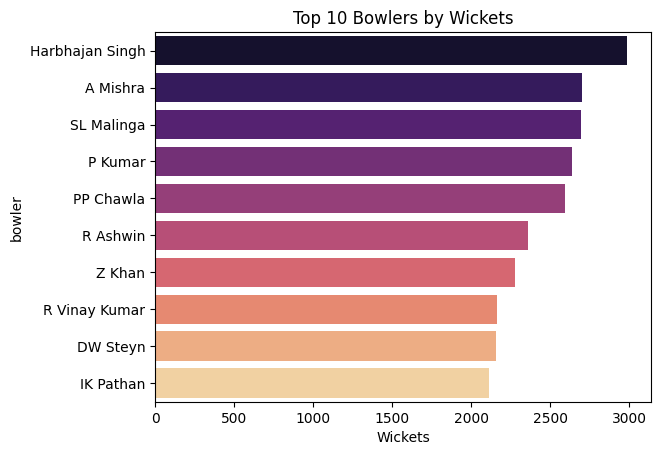

In [32]:
wickets = deliveries[deliveries['player_dismissed'].notnull()]
top_bowlers = wickets.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10)

sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette="magma", hue=top_bowlers.index, legend=False)
plt.title("Top 10 Bowlers by Wickets")
plt.xlabel("Wickets")
plt.show()

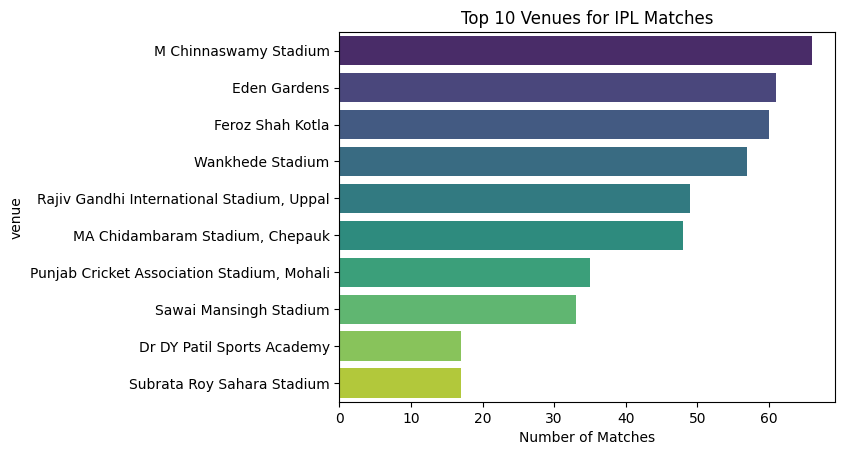

In [33]:
top_venues=matches['venue'].value_counts().head(10)
sns.barplot(x=top_venues.values, y=top_venues.index, palette="viridis", hue=top_venues.index, legend=False)
plt.title("Top 10 Venues for IPL Matches")
plt.xlabel("Number of Matches")
plt.show()

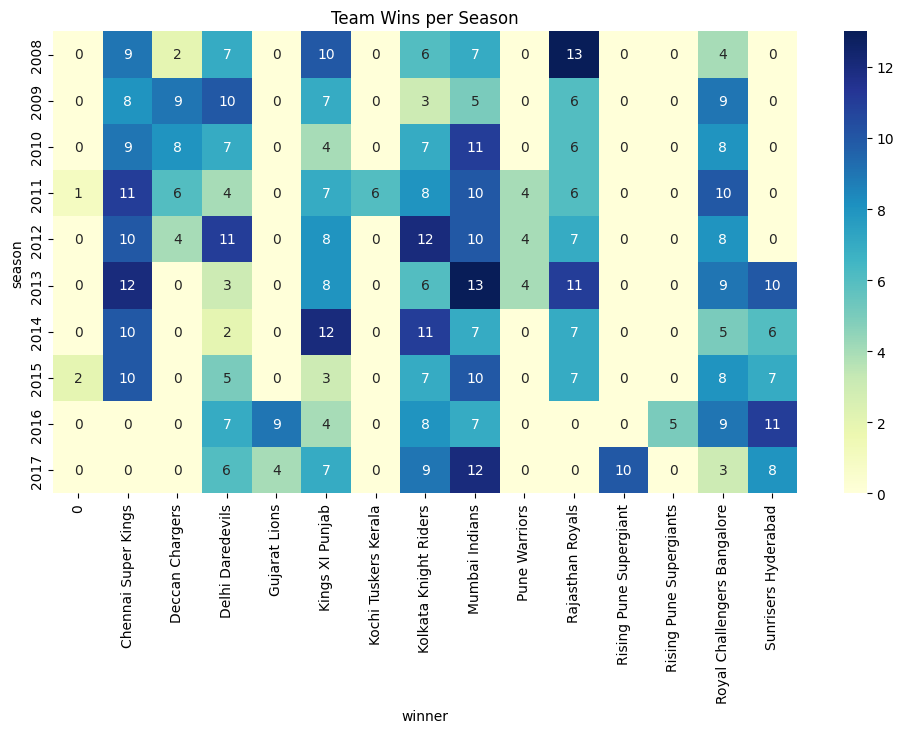

In [34]:
season_team = matches.pivot_table(index='season', columns='winner', values='id', aggfunc='count').fillna(0)
plt.figure(figsize=(12,6))
sns.heatmap(season_team, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Team Wins per Season")
plt.show()


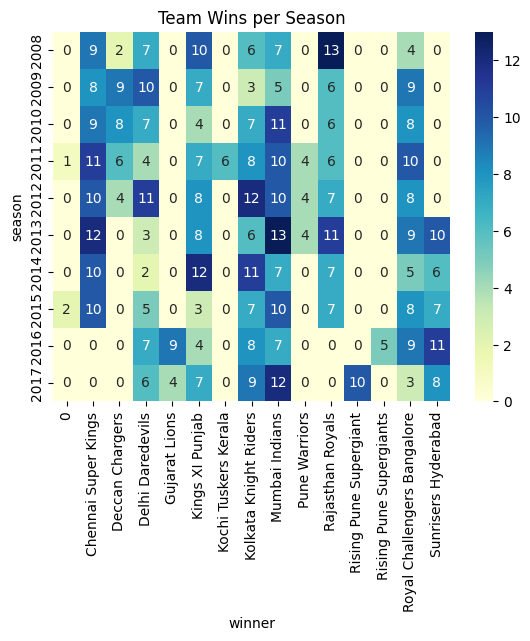

In [36]:
top_season_team = matches.pivot_table(index='season', columns='winner', values='id', aggfunc='count').fillna(0)
sns.heatmap(top_season_team, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Team Wins per Season")
plt.show()

In [38]:
merged_df = pd.merge(deliveries, matches[['id', 'season']], left_on='match_id', right_on='id')

season_batsman_runs = merged_df.groupby(['season', 'batsman'])['batsman_runs'].sum().reset_index()

top_batsman_per_season = season_batsman_runs.loc[season_batsman_runs.groupby('season')['batsman_runs'].idxmax()]

print("Top Batsman per Season:")
display(top_batsman_per_season)

Top Batsman per Season:


,season,batsman,batsman_runs
115,2008,SE Marsh,616
229,2009,ML Hayden,572
446,2010,SR Tendulkar,618
502,2011,CH Gayle,608
684,2012,CH Gayle,733
910,2013,MEK Hussey,733
1088,2014,RV Uthappa,660
1148,2015,DA Warner,562
1383,2016,V Kohli,973
1422,2017,DA Warner,641


In [39]:
batsman_runs = deliveries.groupby('batsman')['batsman_runs'].sum().reset_index()
batsman_balls = deliveries.groupby('batsman')['ball'].count().reset_index()
batsman_balls = batsman_balls.rename(columns={'ball': 'balls_faced'})

batsman_stats = pd.merge(batsman_runs, batsman_balls, on='batsman')
batsman_stats['strike_rate'] = (batsman_stats['batsman_runs'] / batsman_stats['balls_faced']) * 100
batsman_stats = batsman_stats.sort_values(by='strike_rate', ascending=False)

display(batsman_stats.head())

,batsman,batsman_runs,balls_faced,strike_rate
117,DL Chahar,14,6,233.333333
430,Umar Gul,39,19,205.263158
337,RS Sodhi,4,2,200.000000
69,BCJ Cutting,124,70,177.142857
35,AJ Tye,53,30,176.666667


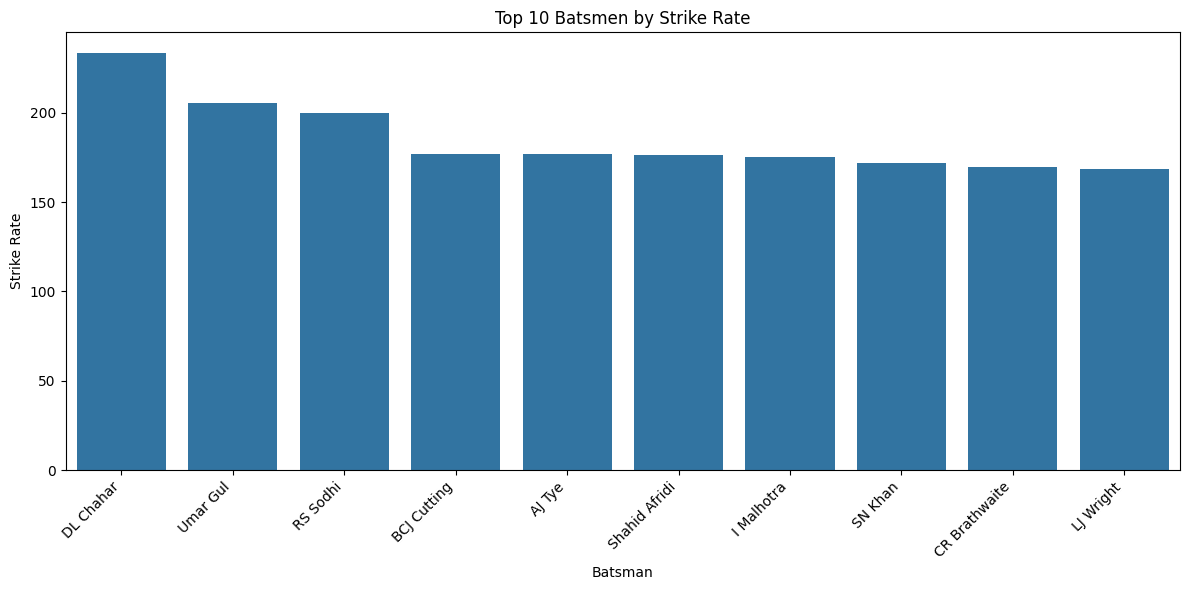

In [40]:
top_10_batsmen_strike_rate = batsman_stats.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_batsmen_strike_rate, x='batsman', y='strike_rate')
plt.title("Top 10 Batsmen by Strike Rate")
plt.xlabel("Batsman")
plt.ylabel("Strike Rate")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [41]:
bowler_runs = deliveries.groupby('bowler')['total_runs'].sum().reset_index()
bowler_balls = deliveries.groupby('bowler')['ball'].count().reset_index()
bowler_balls = bowler_balls.rename(columns={'ball': 'balls_bowled'})

bowler_stats = pd.merge(bowler_runs, bowler_balls, on='bowler')
bowler_stats['overs_bowled'] = bowler_stats['balls_bowled'] / 6
bowler_stats['economy_rate'] = bowler_stats['total_runs'] / bowler_stats['overs_bowled']
bowler_stats = bowler_stats.sort_values(by='economy_rate', ascending=True)

display(bowler_stats.head())

,bowler,total_runs,balls_bowled,overs_bowled,economy_rate
20,AC Gilchrist,0,1,0.166667,0.00
209,N Rana,3,6,1.000000,3.00
210,NB Singh,18,25,4.166667,4.32
310,Sachin Baby,8,10,1.666667,4.80
32,AM Rahane,5,6,1.000000,5.00


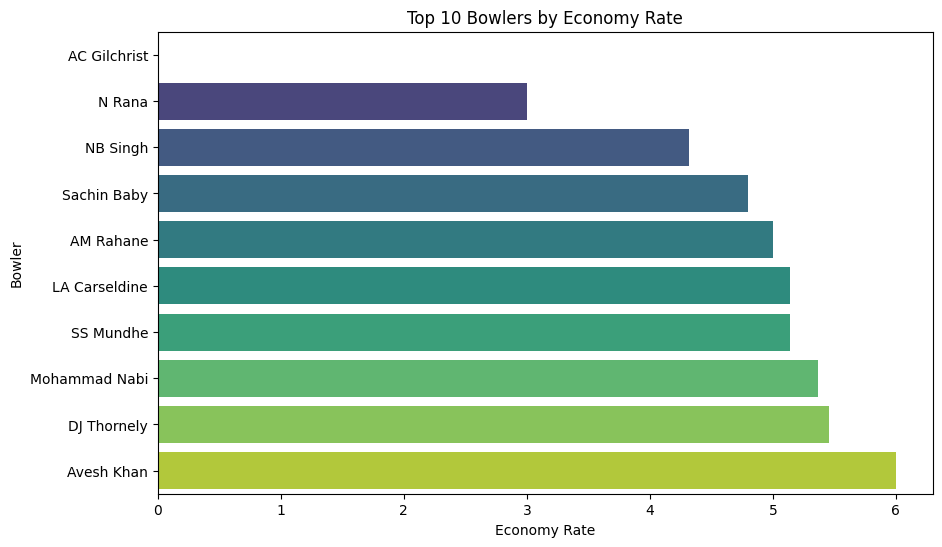

In [42]:
top_10_bowlers_economy = bowler_stats.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_bowlers_economy, x='economy_rate', y='bowler', palette='viridis', hue='bowler', legend=False)
plt.title("Top 10 Bowlers by Economy Rate")
plt.xlabel("Economy Rate")
plt.ylabel("Bowler")
plt.show()

In [43]:
sns.set_style("whitegrid")
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (10,6)


In [45]:
matches.to_csv("cleaned_matches.csv", index=False)
deliveries.to_csv("cleaned_deliveries.csv", index=False)
